In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Mushroom dataset
df = pd.read_csv("/content/mushroom.csv")


In [3]:
df

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
0         distant     broad       pink    tapering  ...    partial      brown   
1         crowded    narrow  chocolate   enlarging  ...  universal      brown   
2         crowded     broad     purple    tapering  ...  universal     yellow   
3           close     broad     orange   enlarging  ...    partial     yellow   
4         crowded    narrow     orange   enlarging  ...  universal      white   
...           ...       ...        ...         ...  ...        ...        ...   
1995      crowded    narrow  chocolate    tapering  ...    partial     orange   
1996      distant    narrow        red    tapering  ...    partial      white   
1997        close    narrow       pink    tapering  ...    partial      brown   
1998        close    narrow     orange   enlarging  ...  universal     yellow   
1999        close    narrow     purple   enlarging  ...    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  \
0            two   sheathing         chocolate  clustered    waste  poisonous   
1            two   sheathing             brown   numerous    waste     edible   
2            two   sheathing            purple   abundant    waste  poisonous   
3            two    cobwebby             green  clustered  grasses  poisonous   
4           none        none            yellow  clustered    urban  poisonous   
...          ...         ...               ...        ...      ...        ...   
1995         one     flaring            purple   abundant   leaves  poisonous   
1996         one        zone            yellow   numerous    waste  poisonous   
1997         two  evanescent            yellow   abundant    woods  poisonous   
1998         one    cobwebby             brown   solitary    woods  poisonous   
1999         two       large             white   numerous    urban  poisonous   

     stalk_height cap_diameter  
0       14.276173     5.054983  
1        3.952715    19.068319  
2        9.054265     7.205884  
3        5.226499    20.932692  
4       14.037532    12.545245  
...           ...          ...  
1995     5.877891    17.464145  
1996     6.500840    13.501957  
1997    13.558064    11.270020  
1998    11.092703     8.423199  
1999    13.066414    21.056642  

[2000 rows x 25 columns]

In [2]:
# Drop unnecessary column (if present)
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
# Task 1: Exploratory Data Analysis (EDA)
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 

<ipython-input-5-f8e700a51169>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="coolwarm")


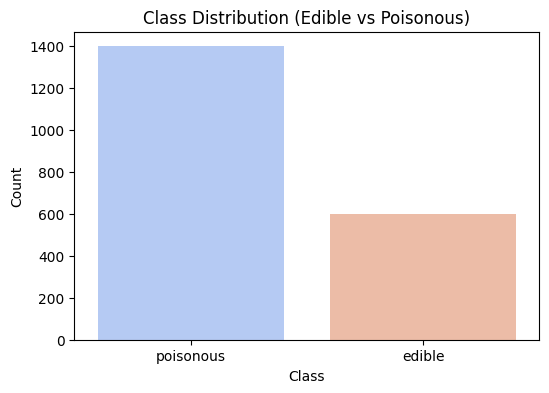

In [5]:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["class"], palette="coolwarm")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

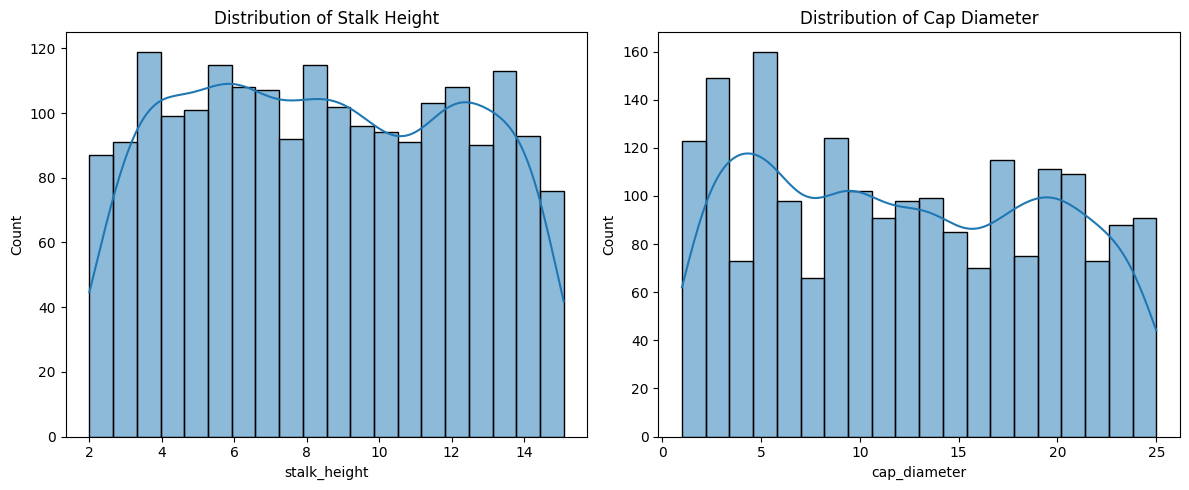

In [6]:
# Feature Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["stalk_height"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Stalk Height")
sns.histplot(df["cap_diameter"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Cap Diameter")
plt.tight_layout()
plt.show()

In [7]:
# Task 2: Data Preprocessing
label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders for reference

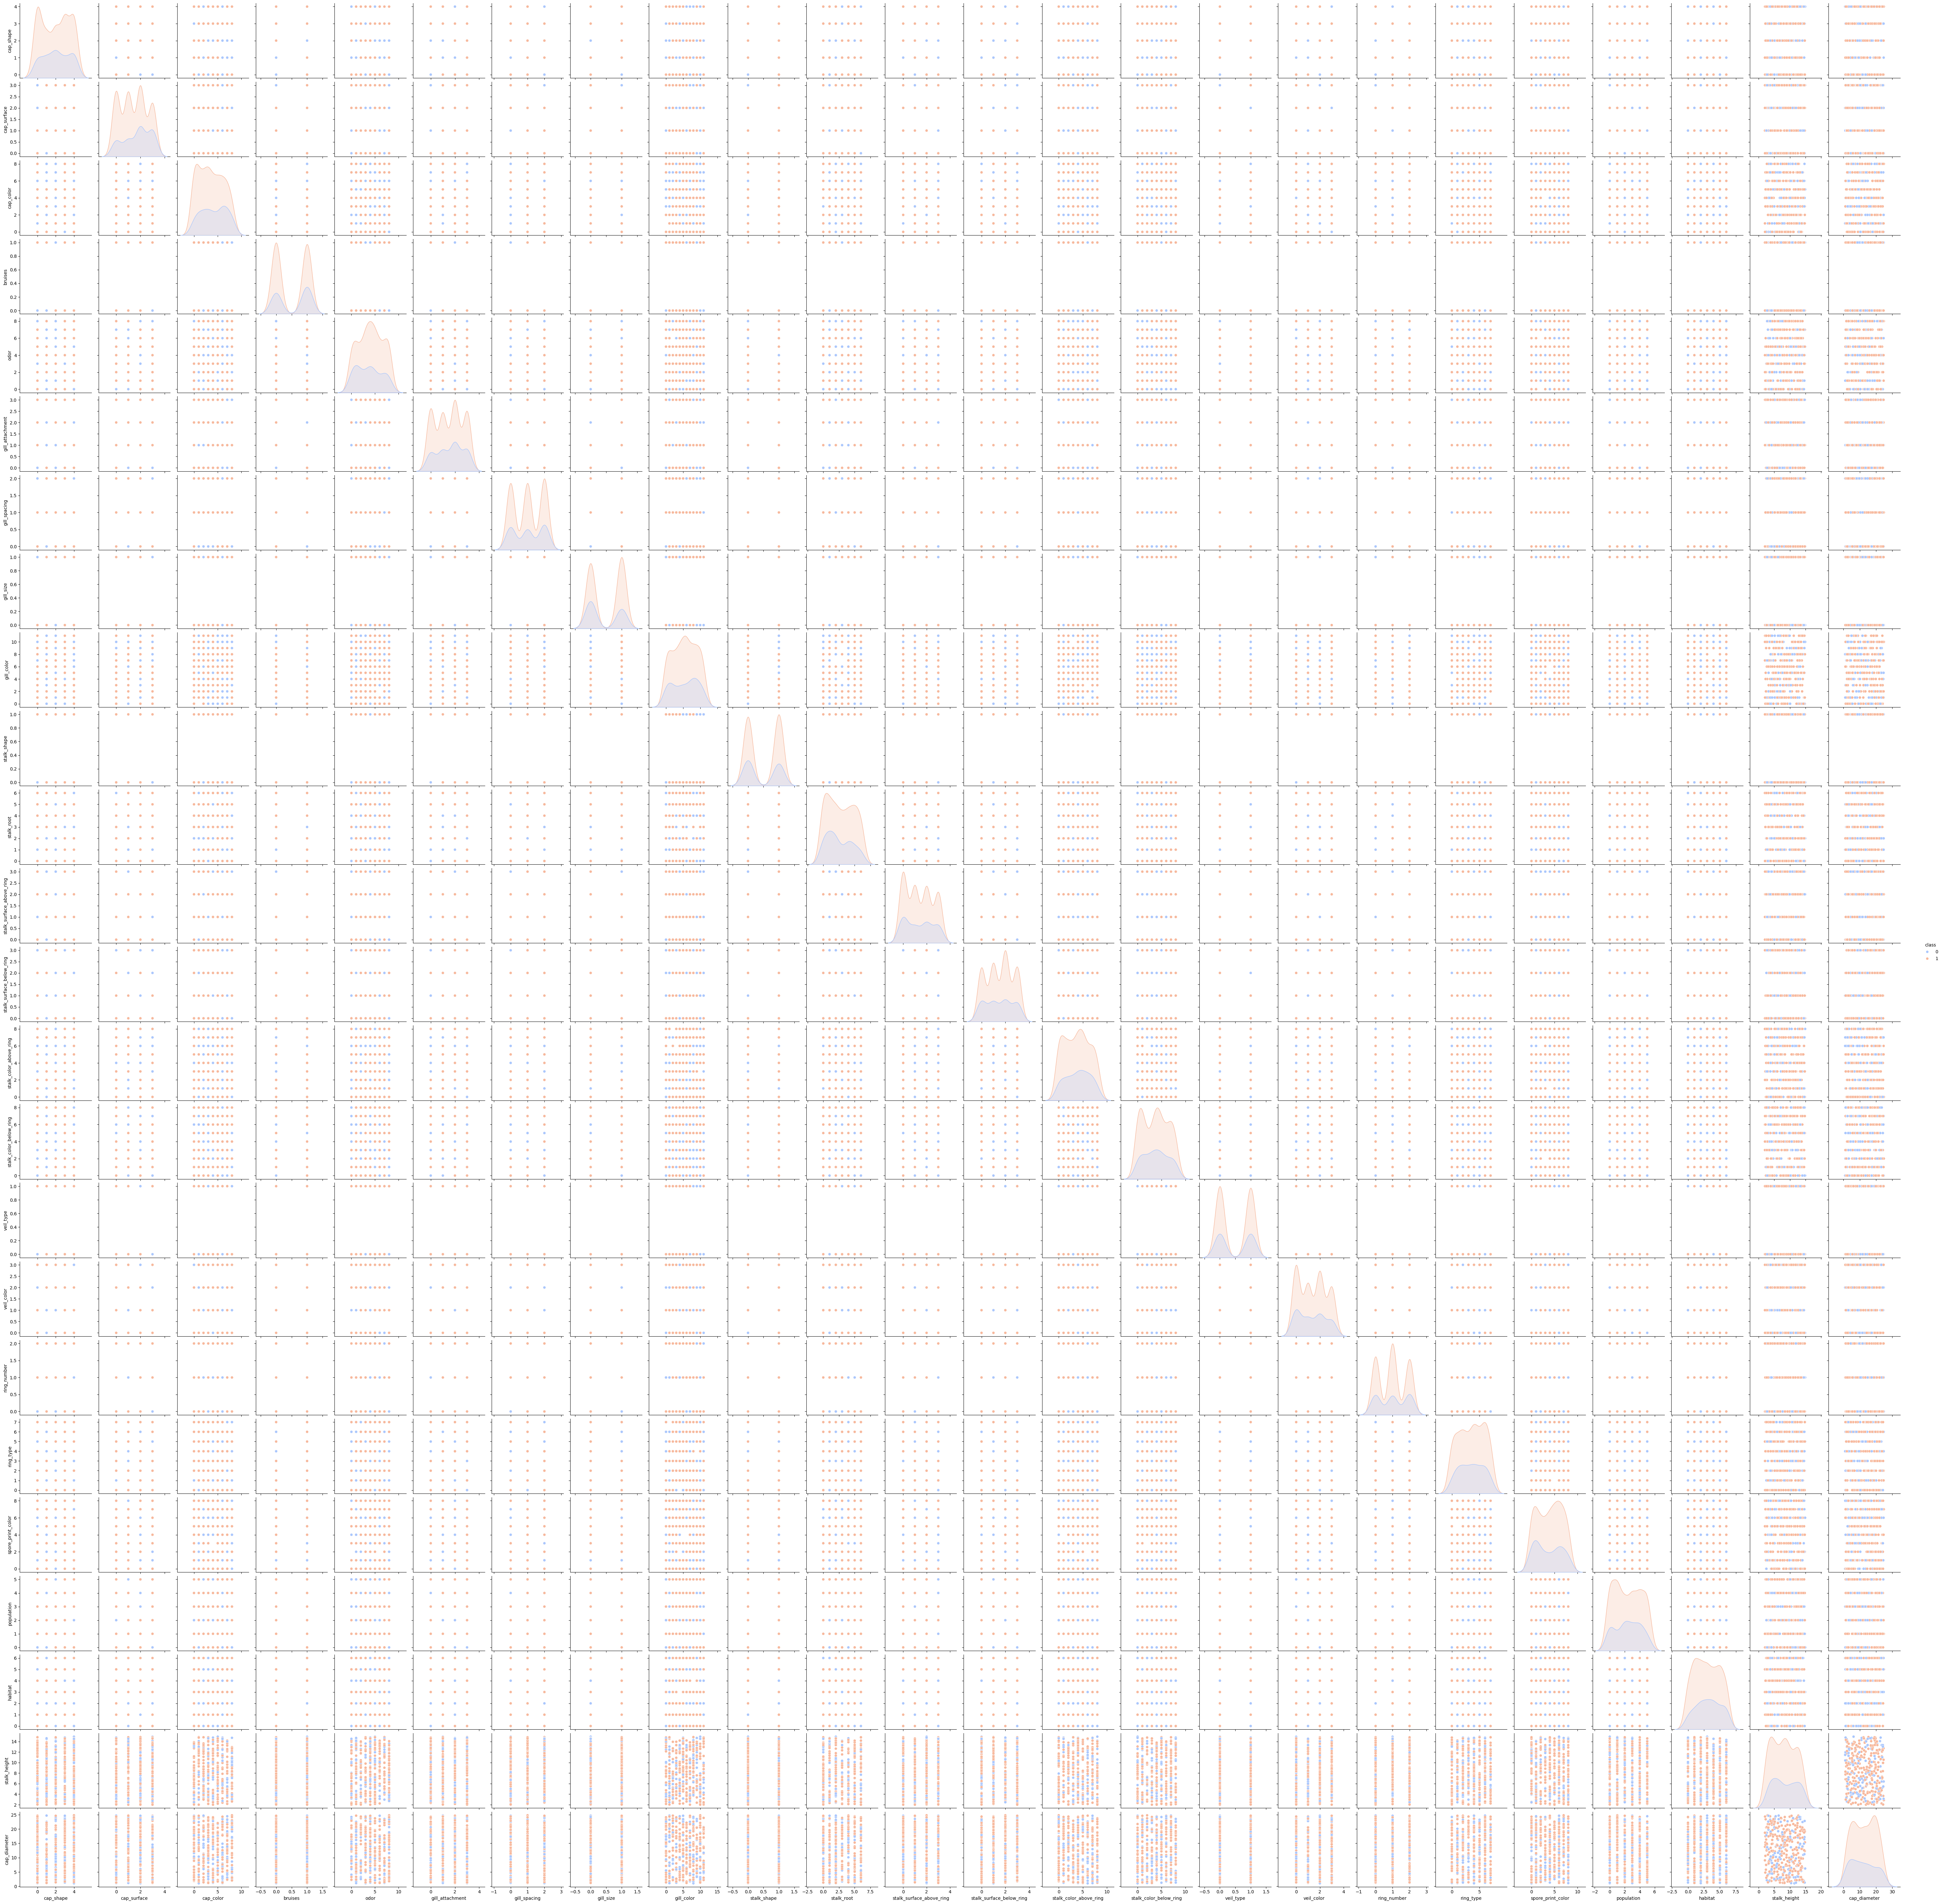

In [11]:
# Define features and target variable
X = df.drop(columns=["class"])
y = df["class"]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Task 3: Data Visualization
sns.pairplot(df.sample(500), hue="class", palette="coolwarm")
plt.show()

In [12]:
# Task 4: SVM Implementation
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


In [13]:
# Task 5: Visualization of SVM Results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400


Confusion Matrix:
[[  0 120]
 [  0 280]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Task 6: Parameter Tuning and Optimization
for kernel in ['linear', 'poly', 'rbf']:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Task 7: Comparison and Analysis
# Compare performance and discuss implications
print("SVM shows high performance with linear and RBF kernels, making it suitable for classification tasks like this.")


Kernel: linear, Accuracy: 0.7000
Kernel: poly, Accuracy: 0.7175
Kernel: rbf, Accuracy: 0.7000
SVM shows high performance with linear and RBF kernels, making it suitable for classification tasks like this.
